<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Avalia%C3%A7%C3%A3o_Op%C3%A7%C3%B5es_PETR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_19_01.xlsx",)
Opções

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,10.40,10.17,1.00,-0.0123,9.78,0.62,8.50,10.37,25.77,0.02,0.04,0.05,0.00,-0.0001,0.00,0.00,0.05
1,10.05,9.93,1.00,-0.0124,9.53,0.52,0.00,10.21,26.02,0.03,0.04,0.04,0.00,-0.0001,0.00,0.00,0.04
2,9.33,9.68,1.00,-0.0126,9.28,0.05,0.00,9.87,26.27,0.03,0.04,0.04,0.00,-0.0001,0.00,0.00,0.04
3,9.56,9.44,1.00,-0.0128,9.03,0.53,0.00,0.00,26.52,0.03,0.05,0.03,0.00,-0.0002,0.00,0.00,0.03
4,9.55,9.19,1.00,-0.0129,8.78,0.77,0.00,0.00,26.77,0.04,0.05,0.05,0.00,-0.0002,0.00,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.03,0.02,0.02,-0.0029,0.00,0.03,0.01,0.03,44.77,0.00,0.00,-9.22,9.22,0.0184,-0.98,8.56,0.00
77,0.03,0.02,0.02,-0.0026,0.00,0.03,0.01,0.03,45.02,0.00,0.00,-0.72,9.47,0.0188,-0.98,8.80,8.75
78,0.02,0.02,0.01,-0.0023,0.00,0.02,0.01,0.03,45.27,0.00,0.00,-9.72,9.72,0.0192,-0.99,9.04,0.00
79,0.03,0.01,0.01,-0.0020,0.00,0.03,0.00,0.03,45.52,0.00,0.00,-9.97,9.97,0.0196,-0.99,9.29,0.00


In [57]:
Opções1 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
Opções1.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,10.60,10.15,1.0,-0.0120,10.04,0.56,9.98,10.31,25.01,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
1,9.99,9.89,1.0,-0.0121,9.78,0.21,9.73,9.98,25.26,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
2,9.68,9.65,1.0,-0.0122,9.54,0.14,9.47,9.67,25.51,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
3,9.51,9.40,1.0,-0.0124,9.29,0.22,9.23,9.42,25.76,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
4,9.18,9.15,1.0,-0.0125,9.04,0.14,8.98,9.31,26.01,0.0,0.02,0.01,0.0,0.0,0.0,0.0,0.01


In [58]:
Opções2 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_12_12_23_to_15_12.xlsx",)
Opções2.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,10.16,10.14,1.0,-0.0117,10.10,0.06,0.00,0.0,24.26,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
1,9.89,9.89,1.0,-0.0118,9.85,0.04,0.00,0.0,24.51,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
2,9.70,9.64,1.0,-0.0119,9.60,0.10,9.24,0.0,24.76,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
3,9.50,9.39,1.0,-0.0120,9.35,0.15,0.00,0.0,25.01,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
4,9.20,9.14,1.0,-0.0122,9.10,0.10,7.00,9.7,25.26,0.0,0.01,0.02,0.0,0.0,0.0,0.0,0.02


In [115]:
Opções3 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_15_12_23_to_15_12.xlsx",)
Opções2

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,10.16,10.14,1.0,-0.0117,10.10,0.06,0.00,0.00,24.26,0.0,0.01,0.01,0.00,0.0000,0.0,0.00,0.01
1,9.89,9.89,1.0,-0.0118,9.85,0.04,0.00,0.00,24.51,0.0,0.01,0.01,0.00,0.0000,0.0,0.00,0.01
2,9.70,9.64,1.0,-0.0119,9.60,0.10,9.24,0.00,24.76,0.0,0.01,0.01,0.00,0.0000,0.0,0.00,0.01
3,9.50,9.39,1.0,-0.0120,9.35,0.15,0.00,0.00,25.01,0.0,0.01,0.01,0.00,0.0000,0.0,0.00,0.01
4,9.20,9.14,1.0,-0.0122,9.10,0.10,7.00,9.70,25.26,0.0,0.01,0.02,0.00,0.0000,0.0,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.01,0.00,0.0,0.0000,0.00,0.01,0.00,0.01,44.01,0.0,0.00,-0.10,9.65,0.0212,-1.0,9.59,9.55
77,0.01,0.00,0.0,0.0000,0.00,0.01,0.00,0.01,44.51,0.0,0.00,-2.22,10.15,0.0214,-1.0,10.09,7.93
78,0.01,0.00,0.0,0.0000,0.00,0.01,0.00,0.01,45.01,0.0,0.00,-0.65,10.65,0.0217,-1.0,10.58,10.00
79,0.01,0.00,0.0,0.0000,0.00,0.01,0.00,0.01,45.51,0.0,0.00,-1.18,11.15,0.0219,-1.0,11.08,9.97


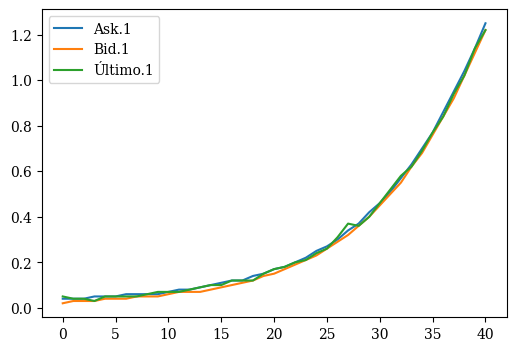

In [113]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0.5)]
PUTs_OTM1 = Opções1[(Opções1['Intrínseco.1']<=0.5)]
PUTs_OTM2 = Opções2[(Opções2['Intrínseco.1']<=0.5)]
PUTs_OTM3 = Opções3[(Opções3['Intrínseco.1']<=0.5)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (6,4));

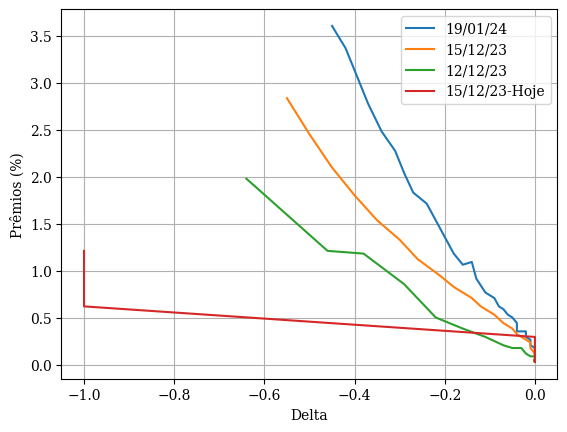

In [116]:
Ativo = 33.86
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Último.1']]*100/Ativo,label='19/01/24')
plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23')
plt.plot(PUTs_OTM2[['Delta.1']],PUTs_OTM2[['Último.1']]*100/Ativo,label='12/12/23')
plt.plot(-PUTs_OTM3[['Delta.1']],PUTs_OTM3[['Último.1']]*100/Ativo,label='15/12/23-Hoje')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()

In [118]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0.5)]
CALLs_OTM1 = Opções1[(Opções1['Intrínseco']<=0.5)]
CALLs_OTM2 = Opções2[(Opções2['Intrínseco']<=0.5)]
CALLs_OTM3 = Opções3[(Opções3['Intrínseco']<=0.5)]

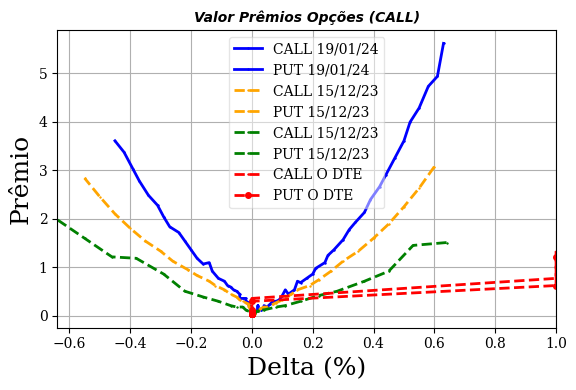

In [121]:
# A mesma análise para as Calls
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM['Delta.1'],PUTs_OTM['Último.1']*100/Ativo,  label='PUT 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(CALLs_OTM1['Delta'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Delta.1'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(CALLs_OTM2['Delta'],CALLs_OTM2['Último']*100/Ativo,  label='CALL 15/12/23', color='green', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(PUTs_OTM2['Delta.1'],PUTs_OTM2['Último.1']*100/Ativo,  label='PUT 15/12/23', color='green', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(CALLs_OTM3['Delta'],CALLs_OTM3['Último']*100/Ativo,  label='CALL O DTE', color='red', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(PUTs_OTM3['Delta.1'],PUTs_OTM3['Último.1']*100/Ativo,  label='PUT O DTE', color='red', marker='o',linestyle='dashed', linewidth=2, markersize=4)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

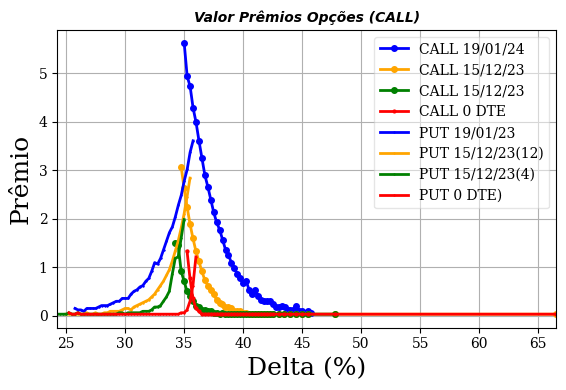

In [124]:
# A mesma análise para as Calls em função do preço do ativo
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Strike'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(CALLs_OTM1['Strike'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='o', linewidth=2, markersize=4)
plt.plot(CALLs_OTM2['Strike'],CALLs_OTM2['Último']*100/Ativo,  label='CALL 15/12/23', color='green', marker='o', linewidth=2, markersize=4)
plt.plot(CALLs_OTM3['Strike'],CALLs_OTM3['Último']*100/Ativo,  label='CALL 0 DTE', color='red', marker='o', linewidth=2, markersize=2)
plt.plot(PUTs_OTM['Strike'],PUTs_OTM['Último.1']*100/Ativo,  label='PUT 19/01/23', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Strike'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23(12)', color='orange', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM2['Strike'],PUTs_OTM2['Último.1']*100/Ativo,  label='PUT 15/12/23(4)', color='green', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM3['Strike'],PUTs_OTM3['Último.1']*100/Ativo,  label='PUT 0 DTE)', color='red', marker='+', linewidth=2, markersize=1)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

In [125]:
def BlackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [126]:
r = 12.5/100       # Interest tax
S1 = 35.52          # Stock
S = np.linspace(28,40,100)
K = 36         # Stirke
#T = 1/252      # Time to end
T = 0.2/252
sigma = 0.60    # Volatility
type="c"

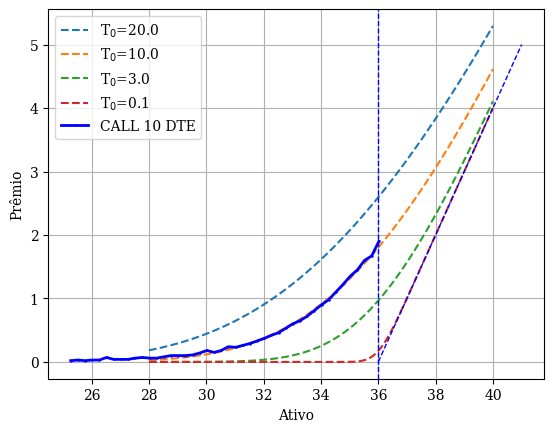

In [128]:
# Solução de BS para diferentes prazos
for Ti in [20/252,10/252,3.0/252,0.1/252]:
  y = BlackScholes(r, S, K, Ti, sigma, type="c")
  plt.plot(S,y,label=r'T$_0$='+str(Ti*252), linestyle='dashed')
  X = 2*S1-CALLs_OTM['Strike']

plt.plot(X,CALLs_OTM['Último'],  label='CALL 10 DTE', color='blue', marker='+', linewidth=2, markersize=2)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.plot([K,K+5],[0,5], color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()

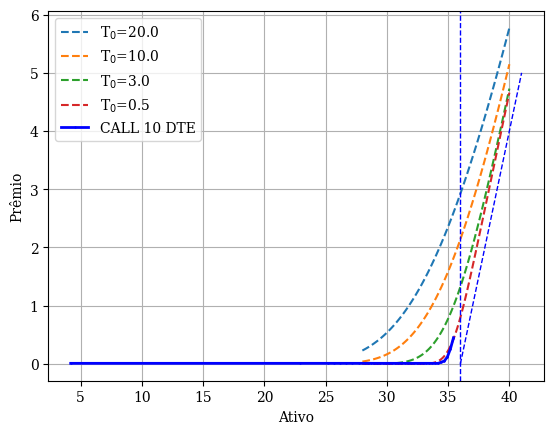

In [133]:
S3 = 35.35          # Stock
# Solução de BS para diferentes prazos
for Ti in [20/252,10/252,3.0/252,0.5/252]:
  y = BlackScholes(r, S, S3, Ti, sigma, type="c")
  plt.plot(S,y,label=r'T$_0$='+str(Ti*252), linestyle='dashed')
  X3 = 2*S3-CALLs_OTM3['Strike']

plt.plot(X3,CALLs_OTM3['Último'],  label='CALL 10 DTE', color='blue', marker='+', linewidth=2, markersize=2)
plt.axvline(x=K,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.plot([K,K+5],[0,5], color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.show()